# Note this model excluded regio1, postalcodes, firingtypes and conditions

they didn't have much influence, since we have cities
interesting about heating type though

In [1]:
import pandas as pd
import seaborn as sns
#the file is a number of data from ImmoScout (webscrapped for all Germany)
file_path = 'https://raw.githubusercontent.com/okravtsova123/ironhack_study/main/MidTermProject/rent.csv'

import warnings

# Suppress PerformanceWarning
warnings.filterwarnings("ignore", message="DataFrame is highly fragmented.", category=pd.errors.PerformanceWarning)

# reading file with different encodings
try:
    df = pd.read_csv(file_path, encoding='utf-8', sep=';')
except UnicodeDecodeError:
    try:
        df = pd.read_csv(file_path, encoding='latin-1',  sep=';')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='ISO-8859-1',  sep=';')


# Cleanng and preparing data

In [2]:
#checking the df
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,energyEfficiencyClass
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,NaN
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,NaN
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,NaN
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,other,9599,3.0,86.0,3.0,NaN,3,False,2,NaN
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,NaN


In [3]:
# Performing additional formatting for column names (lowercase, strip and replace spaces with underscores) - esier to work further
df.columns = [name.strip().replace(" ", "_").lower() for name in df.columns]

In [4]:
df.columns

Index(['regio1', 'servicecharge', 'heatingtype', 'telekomtvoffer',
       'telekomhybriduploadspeed', 'newlyconst', 'balcony', 'picturecount',
       'pricetrend', 'telekomuploadspeed', 'totalrent', 'yearconstructed',
       'scoutid', 'noparkspaces', 'firingtypes', 'haskitchen', 'geo_bln',
       'cellar', 'yearconstructedrange', 'baserent', 'housenumber',
       'livingspace', 'geo_krs', 'condition', 'interiorqual', 'petsallowed',
       'street', 'streetplain', 'lift', 'baserentrange', 'typeofflat',
       'geo_plz', 'norooms', 'thermalchar', 'floor', 'numberoffloors',
       'noroomsrange', 'garden', 'livingspacerange', 'energyefficiencyclass'],
      dtype='object')

In [5]:
#function to check null values
def null_check(df):
    print(f'Total null values per row: \n{df.isnull().sum(axis=1)}\n')
    print(f'Total null values per column: \n{df.isnull().sum()}\n')

In [6]:
#applying
null_check(df)

Total null values per row: 
0         3
1         8
2         4
3         8
4         8
         ..
268845    7
268846    7
268847    3
268848    4
268849    9
Length: 268850, dtype: int64

Total null values per column: 
regio1                           0
servicecharge                 6909
heatingtype                  44856
telekomtvoffer               32619
telekomhybriduploadspeed    223830
newlyconst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomuploadspeed           33358
totalrent                    40517
yearconstructed              57045
scoutid                          0
noparkspaces                175798
firingtypes                  56964
haskitchen                       0
geo_bln                          0
cellar                           0
yearconstructedrange         57045
baserent                         0
housenumber                  71018
livingspace                      0
geo_krs  

In [7]:
#function to find duplicates
def dup_check(df):
    print(f'Duplicates found: {df.duplicated().any()}\n')
    print(f'Number of duplicates: {df.duplicated().sum()}\n')

In [8]:
dup_check(df)

Duplicates found: False

Number of duplicates: 0



In [9]:
#Choosing only new buildings as rent is not controlled by government
df = df[(df['newlyconst']== True)]

In [10]:
df["geo_krs"].nunique()

402

In [11]:
#choosing the facors for the model
df = df.loc[:, ['baserent', 'balcony', 'haskitchen',
       'cellar','livingspace', 'petsallowed', 'firingtypes','geo_krs', 'lift', 'norooms', 'floor', 'garden', 'energyefficiencyclass']]


In [12]:
df

,baserent,balcony,haskitchen,cellar,livingspace,petsallowed,firingtypes,geo_krs,lift,norooms,floor,garden,energyefficiencyclass
2,965.00,True,False,True,83.80,NaN,NaN,Dresden,True,3.0,3.0,False,NaN
14,972.60,True,False,True,87.00,negotiable,gas,Dortmund,True,3.0,0.0,False,NaN
29,520.08,True,False,True,47.28,NaN,district_heating,Schwerin,True,2.0,NaN,False,NaN
48,870.00,True,True,False,81.00,NaN,pellet_heating,Steinburg_Kreis,False,3.0,2.0,False,B
69,900.00,True,False,True,74.80,NaN,district_heating,Dresden,True,3.0,0.0,False,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268806,2200.00,True,True,True,169.00,negotiable,district_heating,Mannheim,True,4.0,1.0,True,NaN
268809,371.43,True,False,True,59.38,no,NaN,Rheinisch_Bergischer_Kreis,True,2.0,NaN,False,NaN
268821,680.00,True,False,True,79.50,no,gas,Rhein_Hunsr?ck_Kreis,False,2.0,1.0,False,NaN
268827,990.00,True,True,False,89.00,no,pellet_heating,Hannover_Kreis,True,2.5,1.0,False,NaN


In [13]:
df = df.reset_index()

In [14]:
df

,index,baserent,balcony,haskitchen,cellar,livingspace,petsallowed,firingtypes,geo_krs,lift,norooms,floor,garden,energyefficiencyclass
0,2,965.00,True,False,True,83.80,NaN,NaN,Dresden,True,3.0,3.0,False,NaN
1,14,972.60,True,False,True,87.00,negotiable,gas,Dortmund,True,3.0,0.0,False,NaN
2,29,520.08,True,False,True,47.28,NaN,district_heating,Schwerin,True,2.0,NaN,False,NaN
3,48,870.00,True,True,False,81.00,NaN,pellet_heating,Steinburg_Kreis,False,3.0,2.0,False,B
4,69,900.00,True,False,True,74.80,NaN,district_heating,Dresden,True,3.0,0.0,False,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21166,268806,2200.00,True,True,True,169.00,negotiable,district_heating,Mannheim,True,4.0,1.0,True,NaN
21167,268809,371.43,True,False,True,59.38,no,NaN,Rheinisch_Bergischer_Kreis,True,2.0,NaN,False,NaN
21168,268821,680.00,True,False,True,79.50,no,gas,Rhein_Hunsr?ck_Kreis,False,2.0,1.0,False,NaN
21169,268827,990.00,True,True,False,89.00,no,pellet_heating,Hannover_Kreis,True,2.5,1.0,False,NaN


In [15]:
null_check(df)

Total null values per row: 
0        3
1        1
2        3
3        1
4        1
        ..
21166    1
21167    3
21168    1
21169    1
21170    1
Length: 21171, dtype: int64

Total null values per column: 
index                        0
baserent                     0
balcony                      0
haskitchen                   0
cellar                       0
livingspace                  0
petsallowed               9357
firingtypes               5328
geo_krs                      0
lift                         0
norooms                      0
floor                     5238
garden                       0
energyefficiencyclass    11456
dtype: int64



In [16]:
df = df.dropna()

In [17]:
#checking unqiue values in hitting
#df['heatingtypes'].unique()

In [18]:
#checking unqiue values in coditions
#df['condition'].unique()

In [19]:
#checking unqiue values in coditions
#df['firingtypes'].nunique()

In [20]:
#unifying first time use and all refurbishement, modernization and renovation in 1 thing

#def condition_clean(state):
#        if 'first_time_use' in state:
#           state='first_time_use'
#        elif state=='fully_renovated' or state=='refurbished' or state=='modernized':
#           state='refurbished'
#       else:
#           state=state
#       return state
    
#unifying types of firing

def firingtypes_clean(ftype):
    if 'gas' in ftype:
        ftype='gas'
    elif 'electricity' in ftype:
        ftype='electricity'
    elif 'solar_heating' in ftype or 'wind_energy' in ftype or'hydro_energy' in ftype or 'bio_energy' in ftype or 'geothermal' in ftype or 'thermal_energy' in ftype or 'renewable_energy' in ftype or 'regenerative_energy' in ftype:
        ftype='renewable_energy_heating'
    elif "pellet_heating" in ftype or 'fossil_fuels' in ftype or 'wood_chips' in ftype:
        ftype='pellet_heating'
    elif 'district_heating' in ftype:
        ftype='district_heating'
    else:
        ftype=ftype
    return ftype

In [21]:
#applying defined function for cleaning    
#df['condition']=df['condition'].apply(condition_clean)
df['firingtypes']=df['firingtypes'].apply(firingtypes_clean)

/var/folders/jj/y9r3z26d3g90cs_gnc5ptl640000gn/T/ipykernel_13342/1026034001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['firingtypes']=df['firingtypes'].apply(firingtypes_clean)


In [22]:
#checking energyefficiencyclass
print(df["energyefficiencyclass"].groupby(df["energyefficiencyclass"]).count())

#droping rows with NO_INFORMATION
df=df[df["energyefficiencyclass"]!='NO_INFORMATION'].reset_index()

energyefficiencyclass
A                 1047
A_PLUS             866
B                 1172
C                  247
D                   49
E                    8
F                    5
NO_INFORMATION     573
Name: energyefficiencyclass, dtype: int64


In [23]:
#cleaning two useless columns. And heatng type is removed as it's a copy of firing type
columns_needed=['baserent', 'balcony', 'haskitchen',
       'cellar','livingspace', 'petsallowed', 'geo_krs', 'lift', 'norooms', 'floor', 'garden', 'energyefficiencyclass']
df=df.loc[: , columns_needed]

In [24]:
#cheking spelling mistakes in regio1
#df['regio1'].groupby(df['regio1']).count()

In [25]:
#clening misspellings

def regio1_clean(region):
    if region=='Baden_W?rttemberg':
        region='Baden-Württemberg'
    elif region=='Th?ringen':
        region='Thüringia'
    else:
        region=region
    return region

In [26]:
#applying
#df['regio1']=df['regio1'].apply(regio1_clean)

In [27]:
#cheking spelling mistakes in geo_krs
#REMOVE cities with less than 10 appartments, because they give too much influence in model
cities = df.groupby('geo_krs').size().reset_index(name='count')
cities_to_drop = cities[cities['count'] <= 20]
df = df[~df['geo_krs'].isin(cities_to_drop['geo_krs'])].reset_index(drop=True)
df['geo_krs'].groupby(df['geo_krs']).count()

geo_krs
Aachen                         26
Aachen_Kreis                   24
Berlin                        389
Bielefeld                      24
Bonn                           33
Braunschweig                   33
D?sseldorf                     53
Dortmund                       24
Dresden                       142
Frankfurt_am_Main             134
G?tersloh_Kreis                32
Gro?_Gerau_Kreis               21
Hamburg                        87
Hannover_Kreis                 22
Harburg_Kreis                  24
Heilbronn_Kreis                21
Koblenz                        22
Leipzig                       152
M?hldorf_am_Inn_Kreis          33
M?nchen                       140
M?nchengladbach                33
M?nster                        23
Magdeburg                      31
Main_Kinzig_Kreis              26
Mainz                          30
Mannheim                       51
N?rnberg                       25
Offenbach_Kreis                29
Ortenaukreis                   25
Potsda

In [28]:
#checking pets
df['petsallowed'].groupby(df['petsallowed']).count()

petsallowed
negotiable    1268
no             493
yes            117
Name: petsallowed, dtype: int64

In [29]:
#checking outliers - identifying IQR

df['baserent'].describe()
IQR=df['baserent'].quantile(0.75)-df['baserent'].quantile(0.25)
base_min=df['baserent'].quantile(0.25)-1.5*IQR
base_max=df['baserent'].quantile(0.75)+3*IQR
print(base_min, base_max)

#countring how many flats are outliers
x_low=0
x_high=0
for price in df['baserent']:
    if price<base_min:
        x_low+=1
    elif price>base_max:
        x_high+=1

print(f'outliers too low:{x_low}\noutliers too high: {x_high}')

-60.0 3350.0
outliers too low:0
outliers too high: 17


In [30]:
#dropping rows with outliers
df=df.loc[df['baserent']<base_max]

In [31]:
df.isna().sum()

baserent                 0
balcony                  0
haskitchen               0
cellar                   0
livingspace              0
petsallowed              0
geo_krs                  0
lift                     0
norooms                  0
floor                    0
garden                   0
energyefficiencyclass    0
dtype: int64

In [32]:
#file_path = r"C:\Users\user\Desktop\ironhack_study\MidTermProject\output.csv"
#df.to_csv(file_path, index=False)

# ENCODING FACTORS FOR MODEL CREATION

In [33]:
#splitting df into numericals and categoricals
categoricals = df.select_dtypes(include=[object, bool])
numericals = df.select_dtypes(include = 'number')

In [34]:
categoricals

,balcony,haskitchen,cellar,petsallowed,geo_krs,lift,garden,energyefficiencyclass
0,True,True,True,negotiable,Berlin,True,False,B
1,True,False,False,no,M?nchen,True,False,C
2,True,False,True,negotiable,Hamburg,True,False,B
3,True,True,True,no,M?nchen,True,False,A
4,True,True,True,yes,Dresden,True,False,C
...,...,...,...,...,...,...,...,...
1873,True,False,True,yes,Dresden,True,False,B
1874,True,False,True,no,Leipzig,True,False,B
1875,True,True,False,yes,Dresden,True,False,C
1876,True,True,True,negotiable,Berlin,True,True,C


In [35]:
numericals

,baserent,livingspace,norooms,floor
0,1338.43,73.54,2.0,0.0
1,1390.00,33.00,1.0,3.0
2,1299.00,90.30,3.0,2.0
3,1680.00,91.00,1.5,2.0
4,1337.22,116.28,3.0,1.0
...,...,...,...,...
1873,1217.00,109.10,4.0,2.0
1874,1159.36,144.92,4.0,1.0
1875,1533.92,121.74,5.0,2.0
1876,1162.88,58.88,2.0,0.0


In [36]:
ordinals = categoricals[["energyefficiencyclass", "balcony","haskitchen", "cellar", "lift", "garden", "petsallowed"]].reset_index()
nominals = categoricals.drop(columns=["energyefficiencyclass", "balcony","haskitchen", "cellar", "lift", "garden","petsallowed"]).reset_index()

In [37]:
nominals=nominals.drop('index', axis=1)
nominals

,geo_krs
0,Berlin
1,M?nchen
2,Hamburg
3,M?nchen
4,Dresden
...,...
1856,Dresden
1857,Leipzig
1858,Dresden
1859,Berlin


In [38]:
#checking how we will encode the ordinals
ordinals["energyefficiencyclass"].groupby(df["energyefficiencyclass"]).count()

energyefficiencyclass
A         521
A_PLUS    355
B         765
C         173
D          29
E           1
Name: energyefficiencyclass, dtype: int64

In [39]:
from sklearn.preprocessing import OrdinalEncoder

In [40]:
#encoding energy efficiency class for model creation

enc = OrdinalEncoder(categories=[["F", "E", "D", "C", "B","A", "A_PLUS"]])

ordinals["energyefficiencyclass"] = enc.fit_transform(ordinals[["energyefficiencyclass"]])

In [41]:
#encoding haskitchen for model creation

ordinals["haskitchen"] = ordinals["haskitchen"].astype(object)
enc = OrdinalEncoder(categories=[[False, True]])
ordinals["haskitchen"] = enc.fit_transform(ordinals[["haskitchen"]])

In [42]:
#encoding balcony for model creation

ordinals["balcony"] = ordinals["balcony"].astype(object)
enc = OrdinalEncoder(categories=[[False, True]])
ordinals["balcony"] = enc.fit_transform(ordinals[["balcony"]])

In [43]:
#encoding cellar for model creation

ordinals["cellar"] = ordinals["cellar"].astype(object)
enc = OrdinalEncoder(categories=[[False, True]])
ordinals["cellar"] = enc.fit_transform(ordinals[["cellar"]])

In [44]:
#encoding lift for model creation

ordinals["lift"] = ordinals["lift"].astype(object)
enc = OrdinalEncoder(categories=[[False, True]])
ordinals["lift"] = enc.fit_transform(ordinals[["lift"]])

In [45]:
#encoding garden for model creation

ordinals["garden"] = ordinals["garden"].astype(object)
enc = OrdinalEncoder(categories=[[False, True]])
ordinals["garden"] = enc.fit_transform(ordinals[["garden"]])

In [46]:
#encoding petsallowed for model creation

enc = OrdinalEncoder(categories=[['no', 'negotiable', 'yes']])
ordinals["petsallowed"] = enc.fit_transform(ordinals[["petsallowed"]])

In [47]:
ordinals.isna().sum()

index                    0
energyefficiencyclass    0
balcony                  0
haskitchen               0
cellar                   0
lift                     0
garden                   0
petsallowed              0
dtype: int64

In [48]:
#making dunnies from nominals
nominals = pd.get_dummies(nominals, dtype=int)

In [49]:
nominals.isna().sum()

geo_krs_Aachen                        0
geo_krs_Aachen_Kreis                  0
geo_krs_Berlin                        0
geo_krs_Bielefeld                     0
geo_krs_Bonn                          0
geo_krs_Braunschweig                  0
geo_krs_D?sseldorf                    0
geo_krs_Dortmund                      0
geo_krs_Dresden                       0
geo_krs_Frankfurt_am_Main             0
geo_krs_G?tersloh_Kreis               0
geo_krs_Gro?_Gerau_Kreis              0
geo_krs_Hamburg                       0
geo_krs_Hannover_Kreis                0
geo_krs_Harburg_Kreis                 0
geo_krs_Heilbronn_Kreis               0
geo_krs_Koblenz                       0
geo_krs_Leipzig                       0
geo_krs_M?hldorf_am_Inn_Kreis         0
geo_krs_M?nchen                       0
geo_krs_M?nchengladbach               0
geo_krs_M?nster                       0
geo_krs_Magdeburg                     0
geo_krs_Main_Kinzig_Kreis             0
geo_krs_Mainz                         0


In [50]:
#concating ordinals and nominals
categorical = pd.concat([ordinals,nominals], axis=1).reset_index()

In [51]:
categorical.isna().sum()

level_0                               0
index                                 0
energyefficiencyclass                 0
balcony                               0
haskitchen                            0
cellar                                0
lift                                  0
garden                                0
petsallowed                           0
geo_krs_Aachen                        0
geo_krs_Aachen_Kreis                  0
geo_krs_Berlin                        0
geo_krs_Bielefeld                     0
geo_krs_Bonn                          0
geo_krs_Braunschweig                  0
geo_krs_D?sseldorf                    0
geo_krs_Dortmund                      0
geo_krs_Dresden                       0
geo_krs_Frankfurt_am_Main             0
geo_krs_G?tersloh_Kreis               0
geo_krs_Gro?_Gerau_Kreis              0
geo_krs_Hamburg                       0
geo_krs_Hannover_Kreis                0
geo_krs_Harburg_Kreis                 0
geo_krs_Heilbronn_Kreis               0


In [52]:
categorical=categorical.drop(['level_0', 'index'], axis=1)

In [53]:
categorical=categorical.reset_index()

In [54]:
numericals=numericals.reset_index()

In [55]:
numericals

,index,baserent,livingspace,norooms,floor
0,0,1338.43,73.54,2.0,0.0
1,1,1390.00,33.00,1.0,3.0
2,2,1299.00,90.30,3.0,2.0
3,3,1680.00,91.00,1.5,2.0
4,4,1337.22,116.28,3.0,1.0
...,...,...,...,...,...
1856,1873,1217.00,109.10,4.0,2.0
1857,1874,1159.36,144.92,4.0,1.0
1858,1875,1533.92,121.74,5.0,2.0
1859,1876,1162.88,58.88,2.0,0.0


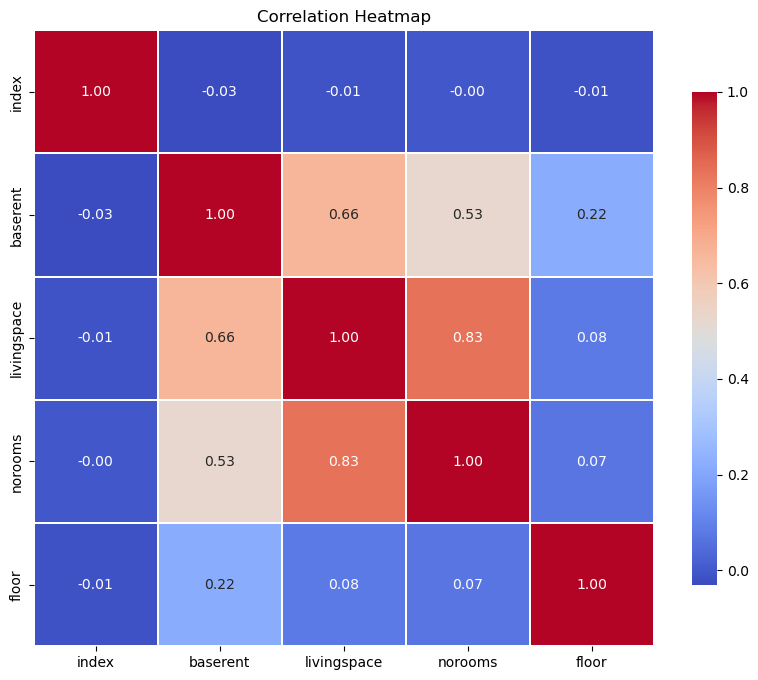

In [56]:
import matplotlib.pyplot as plt
corr_matrix = numericals.corr()
plt.figure(figsize=(10, 8))  # Optional: Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05, cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap')  # Optional: Add a title to your heatmap
plt.show()

In [57]:
#concating categoricals and numericals
final_df = pd.concat([numericals,categorical], axis=1).drop('index', axis=1)

In [58]:
final_df

,baserent,livingspace,norooms,floor,energyefficiencyclass,balcony,haskitchen,cellar,lift,garden,...,geo_krs_N?rnberg,geo_krs_Offenbach_Kreis,geo_krs_Ortenaukreis,geo_krs_Potsdam_Mittelmark_Kreis,geo_krs_Rhein_Erft_Kreis,geo_krs_Rhein_Sieg_Kreis,geo_krs_Rheinisch_Bergischer_Kreis,geo_krs_Stade_Kreis,geo_krs_Stormarn_Kreis,geo_krs_Westerwaldkreis
0,1338.43,73.54,2.0,0.0,4.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1390.00,33.00,1.0,3.0,3.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1299.00,90.30,3.0,2.0,4.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1680.00,91.00,1.5,2.0,5.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1337.22,116.28,3.0,1.0,3.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,1217.00,109.10,4.0,2.0,4.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1857,1159.36,144.92,4.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1858,1533.92,121.74,5.0,2.0,3.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1859,1162.88,58.88,2.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


# Model creation
## X-y split (y is the target variable, in this case, "base rent")

In [59]:
#X-y split
X=final_df.drop('baserent', axis=1)
y=final_df[['baserent']]

In [60]:
X

,livingspace,norooms,floor,energyefficiencyclass,balcony,haskitchen,cellar,lift,garden,petsallowed,...,geo_krs_N?rnberg,geo_krs_Offenbach_Kreis,geo_krs_Ortenaukreis,geo_krs_Potsdam_Mittelmark_Kreis,geo_krs_Rhein_Erft_Kreis,geo_krs_Rhein_Sieg_Kreis,geo_krs_Rheinisch_Bergischer_Kreis,geo_krs_Stade_Kreis,geo_krs_Stormarn_Kreis,geo_krs_Westerwaldkreis
0,73.54,2.0,0.0,4.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,33.00,1.0,3.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,90.30,3.0,2.0,4.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,91.00,1.5,2.0,5.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,116.28,3.0,1.0,3.0,1.0,1.0,1.0,1.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,109.10,4.0,2.0,4.0,1.0,0.0,1.0,1.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1857,144.92,4.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1858,121.74,5.0,2.0,3.0,1.0,1.0,0.0,1.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1859,58.88,2.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
y

,baserent
0,1338.43
1,1390.00
2,1299.00
3,1680.00
4,1337.22
...,...
1856,1217.00
1857,1159.36
1858,1533.92
1859,1162.88


## train_test_split

In [62]:
#train_test split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [65]:
columns_order = X_train.columns

In [66]:
#X_train.hist()

array([[<Axes: title={'center': 'baserent'}>]], dtype=object)

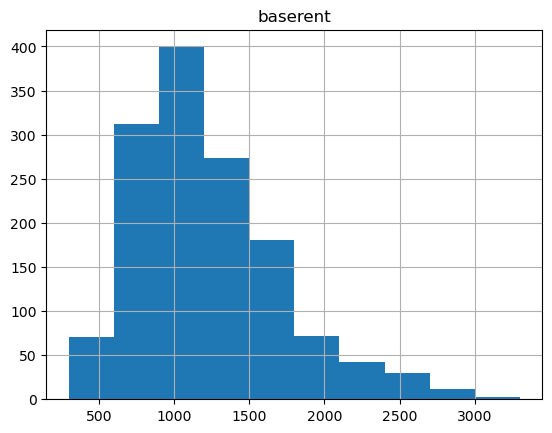

In [67]:
y_train.hist()

## using powertransform for X and Y


In [68]:
from sklearn.preprocessing import PowerTransformer

In [69]:
#fitting power transformer to use in train and test sets

pt=PowerTransformer()
pt.fit(X_train)

PowerTransformer()

In [70]:
#transforming train and test sets

X_train=pt.transform(X_train)
X_test=pt.transform(X_test)

In [71]:
#transforming y

pt.fit(y_train)
y_train=pt.transform(y_train)
y_test=pt.transform(y_test)

# CREATING LINEAR REGRESSION

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

In [73]:
lr=LinearRegression()

In [74]:
#creating model
model=lr.fit(X_train,y_train)
lr.intercept_

array([3.33295008e-05])

<Axes: xlabel='coeff', ylabel='name'>

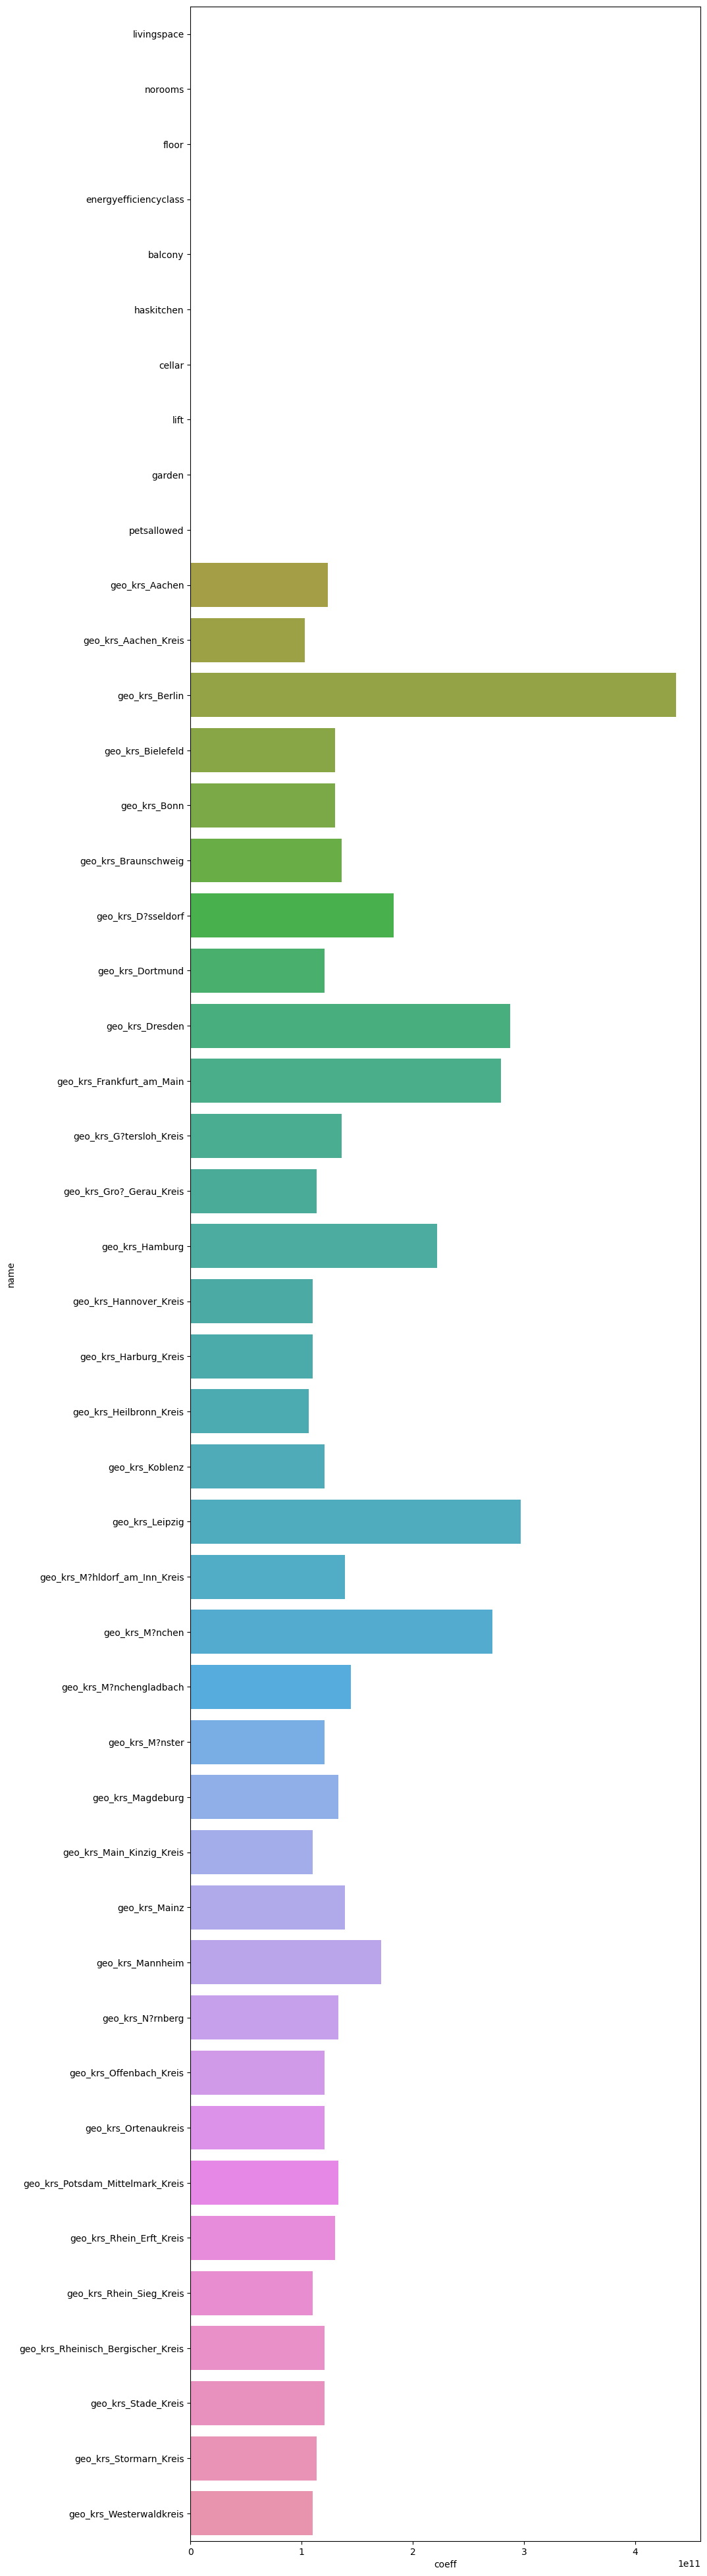

In [75]:
#visualizing
feature_names1=list(X.columns)
coefficients1 = model.coef_
coefficients1=[abs(i) for i in coefficients1[0]]

fi_dict1 = {"name":feature_names1,"coeff":coefficients1}
fi_df1 = pd.DataFrame(fi_dict1)
fi_df1
plt.figure(figsize=(10, 50))
sns.barplot(y = fi_df1["name"],x =fi_df1["coeff"])

# checking model quality

In [76]:
#test model
y_pred=pd.DataFrame(lr.predict(X_test))

In [77]:
#calculating mean errors
MSE_full=mse(y_pred,y_test)
RMSE_full=mse(y_pred,y_test, squared=False)
print(f"mse_full:{MSE_full}\nRMSE:{RMSE_full}")

mse_full:0.14922134003805915
RMSE:0.3862917809610491


In [78]:
#calculating R2 for predictions
r2_score(y_test,y_pred)

0.854554193640334

In [79]:
#calculating r2_score for train set
y_train_pred=pd.DataFrame(lr.predict(X_train))
r2_score(y_train,y_train_pred)

0.8310956973166641

In [80]:
y_test.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
y_pred.head()

In [ ]:
result=pd.concat([y_test.head().reset_index(), round(y_pred.head())], axis=1)
result.reset_index()
result.rename(columns={'baserent': 'real_price', 0:'predicted_price'}, inplace=True)


In [ ]:
# Calculate accuracy
result['Accuracy'] = abs(round(100-(result['predicted_price'] - result['real_price']).abs() / result['real_price'] * 100))

# Print or display the DataFrame
print(result[['index', 'real_price', 'predicted_price', 'Accuracy']])

In [ ]:
result.dtypes

In [ ]:
#file_path = r"C:\Users\user\Desktop\ironhack_study\MidTermProject\for tableu\results.csv"
#result.to_csv(file_path, index=False)

In [ ]:
#creating user interface - INPUTING

def input_data():
    column_names = ['livingspace', 'norooms', 'floor', 'energyefficiencyclass', 'balcony', 'haskitchen', 'cellar', 'lift', 'garden','petsallowed', 'geo_krs']
    df_input=pd.DataFrame(columns=column_names)
    row_index = 1
    for i in column_names:
        if i=='livingspace':
            x=input('What is the size of the appartment? Input a number of sqr m: ')
            x=int(x)
            df_input.loc[row_index, i] = x
        elif i=='norooms':
            x=input('How many rooms are in the appartment? Input a number of rooms: ')
            x=int(x)
            df_input.loc[row_index, i] = x
        elif i=='floor':
            x=input('What floor is it at? Input a number: ')
            x=int(x)
            df_input.loc[row_index, i] = x
        elif i=='energyefficiencyclass':
            x=input('What energy efficiency class is it? Input a letter: ')
            x=x.upper()
            if x=='A+':
                x='A_PLUS'
            df_input.loc[row_index, i] = x
        elif i=='balcony':
            x=input('Does it have a balcony? Say yes or no: ')
            if x=='yes':
                x=True
            elif x=='no':
                x=False
            df_input.loc[row_index, i] = x
        elif i=='haskitchen':
            x=input('Does it have kitchen? Say yes or no: ')
            if x=='yes':
                x=True
            elif x=='no':
                x=False
            df_input.loc[row_index, i] = x
        elif i=='cellar':
            x=input('Does it have cellar? Say yes or no: ')
            if x=='yes':
                x=True
            elif x=='no':
                x=False
            df_input.loc[row_index, i] = x
        elif i=='lift':
            x=input('Does it have lift? Say yes or no: ')
            if x=='yes':
                x=True
            elif x=='no':
                x=False
            df_input.loc[row_index, i] = x
        elif i=='garden':
            x=input('Does it have garden? Say yes or no: ')
            if x=='yes':
                x=True
            elif x=='no':
                x=False
            df_input.loc[row_index, i] = x 
        elif i=='petsallowed':
            x=input('Are the pets allowed in this appartment? Input yes, no or negotiable: ')
            df_input.loc[row_index, i] = x 
        elif i=='geo_krs':
            x=input('What is the city? Please choose one of those in the list: ')
            df_input.loc[row_index, i] = x
    return df_input

#FUNCTION FOR PREDICTION
def predict(input_df):
    #splitting df into numericals and categoricals
    input_df['livingspace'] = input_df['livingspace'].astype(float)
    input_df['norooms'] = input_df['norooms'].astype(float)
    input_df['floor'] = input_df['floor'].astype(float)

    categoricals_input = input_df.select_dtypes(include=[object, bool])
    numericals_input = input_df.select_dtypes(include = 'number').reset_index()

    #splitting ordinals and categoricals
    ordinals_input = categoricals_input[["energyefficiencyclass", "balcony","haskitchen", "cellar", "lift", "garden", "petsallowed"]].reset_index()
    nominals_input = categoricals_input.drop(columns=["energyefficiencyclass", "balcony","haskitchen", "cellar", "lift", "garden","petsallowed"]).reset_index()

    #encoding energy efficiency class 
    enc_input = OrdinalEncoder(categories=[["F", "E", "D", "C", "B","A", "A_PLUS"]])
    ordinals_input["energyefficiencyclass"] = enc_input.fit_transform(ordinals_input[["energyefficiencyclass"]])
    
    #encoding haskitchen
    
    ordinals_input["haskitchen"] = ordinals_input["haskitchen"].astype(object)
    enc_input = OrdinalEncoder(categories=[[False, True]])
    ordinals_input["haskitchen"] = enc_input.fit_transform(ordinals_input[["haskitchen"]])
    
    #encoding balcony

    ordinals_input["balcony"] = ordinals_input["balcony"].astype(object)
    enc = OrdinalEncoder(categories=[[False, True]])
    ordinals_input["balcony"] = enc_input.fit_transform(ordinals_input[["balcony"]])

    #encoding cellar
    
    ordinals_input["cellar"] = ordinals_input["cellar"].astype(object)
    enc = OrdinalEncoder(categories=[[False, True]])
    ordinals_input["cellar"] = enc_input.fit_transform(ordinals_input[["cellar"]])
    
    #encoding lift
    
    ordinals_input["lift"] = ordinals_input["lift"].astype(object)
    enc = OrdinalEncoder(categories=[[False, True]])
    ordinals_input["lift"] = enc_input.fit_transform(ordinals_input[["lift"]])

    #encoding garden

    ordinals_input["garden"] = ordinals_input["garden"].astype(object)
    enc_input = OrdinalEncoder(categories=[[False, True]])
    ordinals_input["garden"] = enc_input.fit_transform(ordinals_input[["garden"]])

    #encoding petsallowed

    enc_input = OrdinalEncoder(categories=[['no', 'negotiable', 'yes']])
    ordinals_input["petsallowed"] = enc_input.fit_transform(ordinals_input[["petsallowed"]])

    #making dunnies from nominals
    nominals_input = pd.get_dummies(nominals_input, dtype=int)
    list_columns=final_df.columns.to_list()
    city_remove='geo_krs_'+input_df.loc[1, 'geo_krs']
    values_to_remove=['baserent','livingspace', 'norooms', 'floor', 'energyefficiencyclass', 'balcony', 'haskitchen', 'cellar', 'lift', 'garden','petsallowed', city_remove]
    for value in values_to_remove:
        if value in list_columns:
            list_columns.remove(value)
    for col_name in list_columns:
        nominals_input[col_name] = 0

    #concating categoricals and numericals
    X_input = pd.concat([numericals_input,ordinals_input,nominals_input], axis=1).drop('index', axis=1)
    X_input

    #transforming train and test sets
    # Reorder the columns in X_input to match the order in X_train
    X_input = X_input.reindex(columns=columns_order)
    X_input=pt.transform(X_input)
    X_input
    y_pred_input=lr.predict(X_input)

    print(f'Got ya! The monthly base rent will be: {y_pred_input} EUR')

In [ ]:
input_df=input_data()
print("Data you've inputed:")
predict(input_df)

In [ ]:
input_data()